# Monitoria 4

**Objetivos de Aprendizado:**

- Revisar a diferença entre `print` e `return`.
- Implementar e entender o método da bissecção.
- Ver algumas aplicações do método da bissecção.

## `print` *versus* `return`

É importante que tenhamos clareza quanto à diferença entre essas duas coisas. Tipicamente, usamos `print` quando **desejamos imprimir determinado resultado na tela**. Jupyter Notebooks são particularmente ruins para assinalar este ponto, pois eles dão a falsa sensação de que uma expressão `print` nunca é necessária. Exemplo:

In [1]:
"Free Julian Assange!"

'Free Julian Assange!'

In [2]:
print("Free Julian Assange!")

Free Julian Assange!


Em certas situações, quando estamos escrevendo funções, gostaríamos de que elas **retornassem** um objeto ao final da execução. Em tais situações, usamos uma expressão `return`. Exemplo:

In [ ]:
def even(n):
    
    """
    Indicator function defined on the set of even integers.
    
    **Returns** True if an even input is given, False otherwise.
    
    Parameters:
    
    n: an int object
    """
    
    if (n % 2 == 0):
        
        return True
        
    else:
        
        return False

In [ ]:
even(42)

In [ ]:
type(even(42))

In [ ]:
even(42) == True

Vamos tentar tornar a diferença entre essas coisas mais clara modificando a nossa função.

In [ ]:
def even(n):
    
    """
    Indicator function defined on the set of even integers.
    
    **Returns** True if an even input is given, False otherwise.
    
    Parameters:
    
    n: an int object
    """
    
    if (n % 2 == 0):
        
        print("True")
    
    else:
        
        print("False")

In [ ]:
even(42)

In [ ]:
type(even(42)) #A função não retorna coisa alguma; o tipo do resultado é NoneType!

Finalmente:

In [ ]:
def even(n):
    
    """
    Indicator function defined on the set of even integers.
    
    **Returns** True if an even input is given, False otherwise.
    
    Parameters:
    
    n: an int object
    """
    
    if (n % 2 == 0):
        
        return "True"
    
    else:
        
        return "False"

In [ ]:
even(42)

In [ ]:
type(even(42)) #A função retorna uma string!

In [ ]:
even(42)[0] #Consigo até mesmo acessar caracteres dessa string!

## O Método da Bissecção

Evidentemente, existe mais de uma maneira de se discutir este algoritmo. Vou discutí-lo no seguinte contexto: temos uma aplicação $f: A \subset \mathbb{R} \to \mathbb{R}$, e desejamos computar um de seus zeros, ou seja, desejamos encontrar um ponto $c \in [a, b]$ tal que:

$$f(c) = 0.$$

A equação acima **nem sempre tem solução!** Basta tomarmos $A = (0, 1)$ e definirmos $f$ pondo $f(x) = x$, para todo $x \in (0, 1)$.

**Existência.** O exemplo acima motiva o seguinte princípio: quando estamos discutindo um conjunto qualquer, devemos **sempre** avaliar se o conjunto é vazio ou não. Em particular, quando estamos discutindo o conjunto de soluções de uma equação, precisamos entender sob quais condições o conjunto é não-vazio.

No contexto de soluções à equação $f(c) = 0$, o **Teorema do Valor Intermediário** nos providência condições suficientes para existência:

**Teorema.** Se $f: [a, b] \to \mathbb{R}$ for uma aplicação contínua em $[a, b]$ e satisfizer $f(a) < k < f(b)$, onde $k$ é um número real qualquer, então existirá $c \in (a, b)$ tal que $f(c) = k$. Idem se $f(a) > k > f(b)$.

**Demonstração.** Veja o Apêndice.

**Corolário.** Se $f: [a, b] \to \mathbb{R}$ for uma aplicação contínua em $[a, b]$ e satisfizer $f(a) \cdot f(b) < 0$, então existirá $c \in (a, b)$ tal que $f(c) = 0$.

**Unicidade.** O que o Teorema acima *não* nos garante é a unicidade da solução. De fato, pode haver mais de um zero em $(a, b)$. O que o nosso algoritmo consegue fazer é selecionar *um* zero. Com um pouco de refinamento, é possível melhorar isso, mas por ora restringiremos nossa atenção a computar *um* zero, e daremo-nos por satisfeitos se conseguirmos.

**Motivação.** Suponhamos que nossa função é $f: [0, 1] \to \mathbb{R}$ dada por $f(x) = x - \frac{1}{4}$. Já sabemos de antemão que $x = \frac{1}{4}$ é um zero, mas vamos entender o que o algoritmo da bissecção faz para chegar a este número.

- Divido o domínio em dois pedaços de igual comprimento: $[0, \frac{1}{2}]$ e $[\frac{1}{2}, 1]$.
- Vejo se $\frac{1}{2}$ é um zero. Se for, paro e **retorno** $\frac{1}{2}$; caso contrário, continuo.
- Verifico se o sinal de $f$ varia em $[0, \frac{1}{2}]$ ou em $[\frac{1}{2}, 1]$. (Note que $f$ é sempre positiva no segundo intervalo, mas que $f(\frac{1}{2}) \cdot f(0) < 0$. Passo a procurar o zero apenas no intervalo onde $f$ troca de sinal.
- Repito até achar um zero, contanto que eu não tenha repetido esses passos um número estúpido de vezes. Outra condição de parada é que meu intervalo de busca se reduza a pó (Teorema dos Intervalos Encaixantes). Vamos repetir pra ilustrar. Um número estúpido é bem mais baixo pr'um ser humano do que pr'um computador mais potente.
- Nova divisão gera $[0, \frac{1}{4}]$ e $[\frac{1}{4}, \frac{1}{2}]$. Por sorte, $\frac{1}{4}$ é um zero, então parao e retorno $\frac{1}{4}$.

Como estender esse raciocínio? Veja abaixo.

In [4]:
import numpy as np

In [5]:
def bisect(func, a, b, eps=1e-6, maxiter=1e2):
    
    """
    Implements the bisection method.
    
    Parameters:
    
    func: a (real) function
    
    a, b: extremities of the interval where func is defined, floats
    
    Options:
    
    eps: tolerance margin for the approximation error
    
    maxiter: maximal number of iterations

    """
    
    i = 0
    
    while (i < maxiter):
        
        c = (a + b) / 2
        
        #print(c)
        
        if (func(c) == 0) or ((b - a) / 2 < eps):
            
            return c
        
        if (np.sign(func(a)) == np.sign(func(c))):
            
            a = c #Fica com intervalo da direita.
            
        else:
            
            b = c #Fica com intervalo da esquerda.

No exemplo simples (até mesmo pr'um computador ruinzinho, como eu), temos:

In [ ]:
bisect(lambda x: x - 0.25, 0, 1)

Podemos pensar em exemplos mais sofisticados também! Considere as aplicações $f: [0, 5] \to \mathbb{R}$ e $g: [0, 2] \to \mathbb{R}$ dadas por:

- $f(x) = \cos(2 \pi x) \cdot \exp(-x)$
- $g(x) = \cos(2 \pi x)$

As duas são evidentemente contínuas, pois resultam da composição de funções contínuas.

Se quiser, pode imaginar que elas descrevem a trajetória de uma variável econômica ao longo de 2, ou 5 anos.

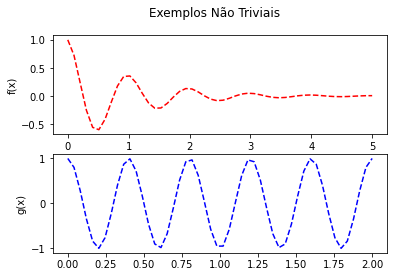

In [6]:
import matplotlib.pyplot as plt

xf = np.linspace(0.0, 5.0)
xg = np.linspace(0.0, 2.0)

yf = np.cos(2 * np.pi * xf) * np.exp(-xf) #Recall that np functions are typically vectorized!
yg = np.cos(2 * np.pi * xf) #Id.

fig, (ax1, ax2) = plt.subplots(2, 1) #2 plots, 1 column
fig.suptitle("Exemplos Não Triviais")

ax1.plot(xf, yf, 'r--')
ax1.set_ylabel("f(x)")

ax2.plot(xg, yg, 'b--')
ax2.set_ylabel('g(x)')

plt.show()

In [7]:
bisect(lambda x: np.cos(2 * np.pi * x) * np.exp(-x), 0, 5)

2.2499996423721313

In [8]:
np.cos(2 * np.pi * 2.2499996423721313) * np.exp(-2.2499996423721313) #"Numericamente" zero.

2.3683658704479627e-07

In [9]:
bisect(lambda x: np.cos(2 * np.pi * x), 0, 2)

1.2500009536743164

In [10]:
np.cos(2 * np.pi * 1.2500009536743164) #"Numericamente" zero.1.2500009536743164

-5.992112452104443e-06

## Outras Aplicações

Com um pouco de sagacidade algébrica, podemos conjurar duas outras aplicações para o método da bissecção, notadamente:

- Busca por pontos fixos.
- Cálculo de raízes $n-$ésimas.

### Pontos Fixos

Seja $\sigma: \mathcal{S} \to \mathcal{S}$ uma aplicação qualquer. Dizemos que $F \in S$ é um ponto fixo de $\sigma$ quando $\sigma(F) \in F$. No contexto mais simples de funções reais a valores reais, dizemos que $F \in \mathcal{S}$ é um ponto fixo de $\sigma$ quando for $\sigma(F) = F$.

Boa parte dos teoremas que fundamentam a Teoria dos Jogos (e modelos de equilíbrio geral) são teoremas de existência e unicidade de ponto fixo. Um dos teoremas mais úteis pode ser enunciado de maneira bastante simples no caso unidimensional:

**Teorema (do Ponto Fixo de Brouwer, *for babies*).** Se $f: [0, 1] \to [0, 1]$ for uma aplicação contínua, então $f$ admitirá ao menos um ponto fixo.

**Demonstração.** Ver Problema 2, item (d), Lista 2.

Ora, com isto em mente, podemos considerar aplicações contínuas da forma $f: [0, 1] \to [0, 1]$ e pensarmos, então, na seguinte transformação: $h: [0, 1] \to [0, 1]$ dada por $h(x) = f(x) - x$. Note que computar um zero de $h$ equivale a computar um ponto fixo de $f$!

**Exemplo.** Encontre um ponto fixo da aplicação $f: [0, 1] \to [0, 1]$ dada por $f(x) = \frac{1}{1+x}$.

In [11]:
bisect(lambda x: (1 / (1+x)) - x, 0, 1)

0.6180334091186523

In [12]:
1 / (1 + 0.6180334091186523)

0.6180342101494078

Note que nem sempre $f(x) - x$ troca de sinal em (0, 1)! Se mantiver o sinal $(0, 1)$, basta testarmos $x = 0$ e $x = 1$ separadamente.

### Raízes $n-$ésimas

O mesmo raciocínio que usamos para computar pontos fixos se aplica ao cálculo de raízes $n-$ésimas. Deixando o formalismo de lado por enquanto, vamos tentar calcular uma das raízes cúbicas de 27. Ora, podemos tomar $x^3 - 27$, e aplicarmos o algoritmo da bissecção a esta função.

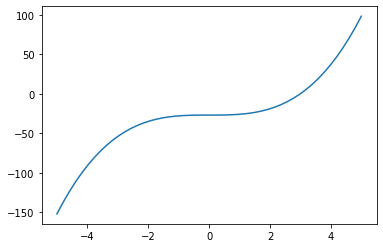

In [13]:
x = np.linspace(-5, 5)

plt.plot(x, x ** 3 - 27)

In [14]:
bisect(lambda x: x ** 3 - 27, -5, 5)

3.0000001192092896

In [15]:
3.0000001192092896 ** 3 - 27 #Numericamente zero.

3.218650945768786e-06

## Apêndice

**Demonstração do Teorema do Valor Intermediário.** Ponhamos $L \equiv \{x \in [a, b]: f(x) \leq k\}$. Claro que $L \neq \emptyset$, pois $a$ pertence a $L$ por hipótese. $L$ é também limitado superiormente (por $b$). Então existe $c \equiv \sup L$ (pois $\mathbb{R}$ é um corpo ordenado completo).

Seja $\{x_n\}_{n \geq 1}$ uma sequência de pontos de $L$ convergente com limite $c$. Temos $f(x_n) \leq k$ para todo inteiro positivo $n$ e, como $f$ foi suposta contínua, segue que $f(x_n) \to f(c)$. Logo $f(c) \leq k$ e, portanto, $c < b$.

Suponhamos por absurdo que fosse $f(c) < k$. Então existe um $\delta > 0$ tal que $x \in [a, b]$ e $|x - c| < \delta$ implicam $f(x) < k$ (aqui, usamos o lema da permanência do sinal). Como $c < b$, é possível escolhermos $c < x < c + \delta$ para obtermos $f(x) < k$. Segue que $x \in L$ e $x > c = \sup L$, uma contradição. Somos então forçados a concluir que se tem $f(c) = k$.